In [1]:
# Incêndios Florestais no Brasil

In [2]:
# importandos as librays

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
# lendo a base de dados

base_dados = pd.read_csv('Dados_Indendio.csv', encoding= 'latin-1')

# registros iniciais

base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
# dimensoes

print(f'Linhas: {base_dados.shape[0]},',
      f'Colunas: {base_dados.shape[1]}')

Linhas: 6454, Colunas: 5


In [7]:
# informações dos tipos de dados

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [8]:
# nulos

base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [9]:
# estatisticas

base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [10]:
# campos unicos

base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

Text(0, 0.5, 'Quantidade')

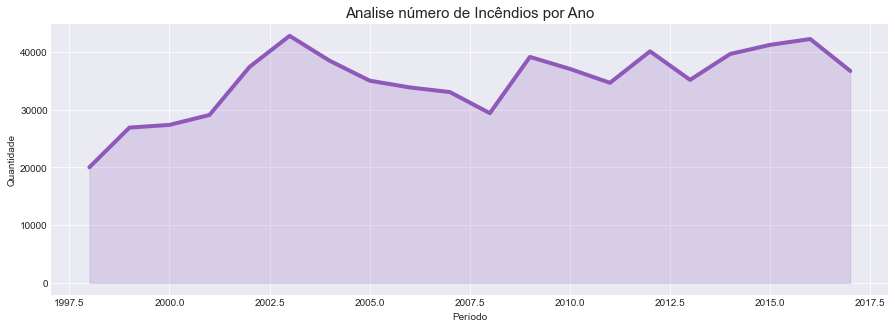

In [37]:
# analise por ano dos incendios

analise = base_dados.groupby(by= ['year']).sum().reset_index()

# grafico

plt.figure(figsize= (15,5))
plt.style.use('seaborn-darkgrid')
plt.title('Analise número de Incêndios por Ano', fontsize= 15)

sns.lineplot(data= analise, x= 'year', y= 'number', estimator= 'sum',
             lw= 4, color= '#8E59B9')
plt.fill_between(data= analise, x='year', y1='number',
                 alpha= 0.2, color= '#8E59B9')

plt.xlabel('Período')
plt.ylabel('Quantidade');

In [39]:
analise_dois = base_dados.groupby(by= ['year', 'month']).sum().reset_index()
analise_dois.head()

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000


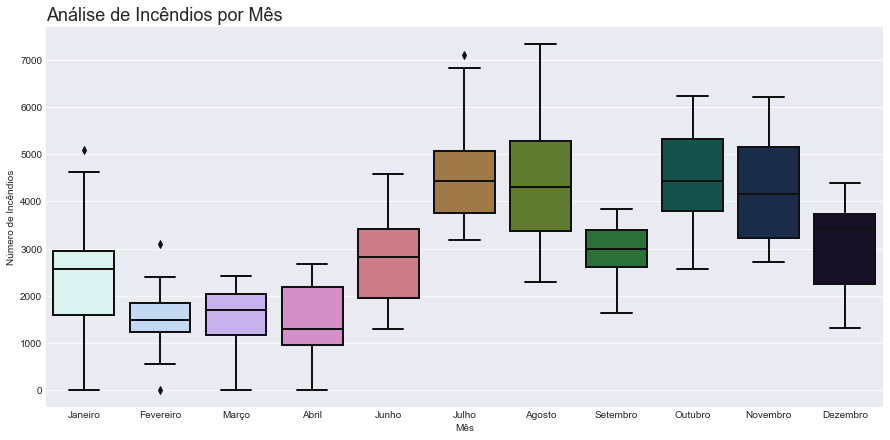

In [57]:
# analise por mes dos incendios

plt.figure(figsize= (15,7))
plt.title('Análise de Incêndios por Mês',  fontsize= 18, loc= 'left')
sns.boxplot(data= analise_dois, x= 'month', y='number',
            palette='cubehelix_r', saturation= 1,linewidth= 2,
            order= ['Janeiro','Fevereiro','Março','Abril','Junho',
                    'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])

plt.xlabel('Mês')
plt.ylabel('Número de Incêndios');

In [64]:
# analise por estados dos incêndios

analise_tres = base_dados.groupby(by= ['state']).sum().reset_index()[['state', 'number']].sort_values('number',ascending= False)
analise_tres.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


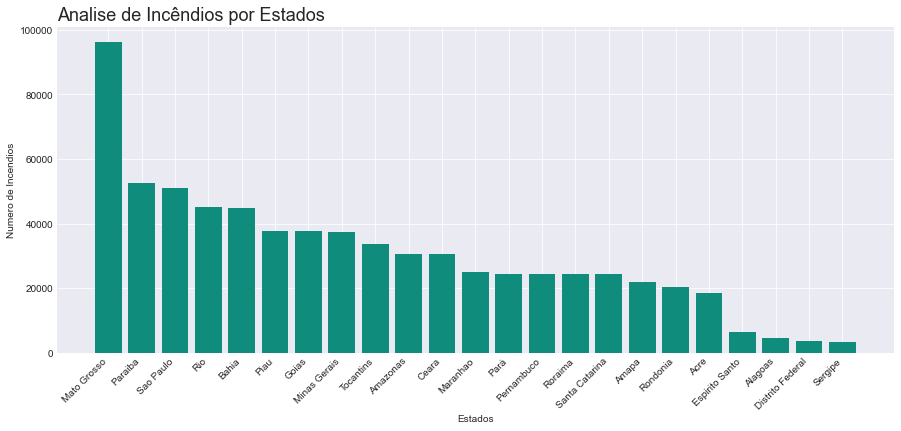

In [71]:
# analise gráfica de incendios por estados

plt.figure(figsize= (15,6), edgecolor= 'gray')
plt.style.use('seaborn-darkgrid')
plt.title('Analise de Incêndios por Estados', fontsize= '18', loc= 'left')

plt.bar(analise_tres.state, analise_tres.number, color= '#108C7C')
plt.xticks(rotation= 45, ha= 'right')

plt.xlabel('Estados')
plt.ylabel('Numero de Incendios');

In [73]:
lista_ranking_incendios = analise_tres['state'][0:10].values
lista_ranking_incendios

array(['Mato Grosso', 'Paraiba', 'Sao Paulo', 'Rio', 'Bahia', 'Piau',
       'Goias', 'Minas Gerais', 'Tocantins', 'Amazonas'], dtype=object)

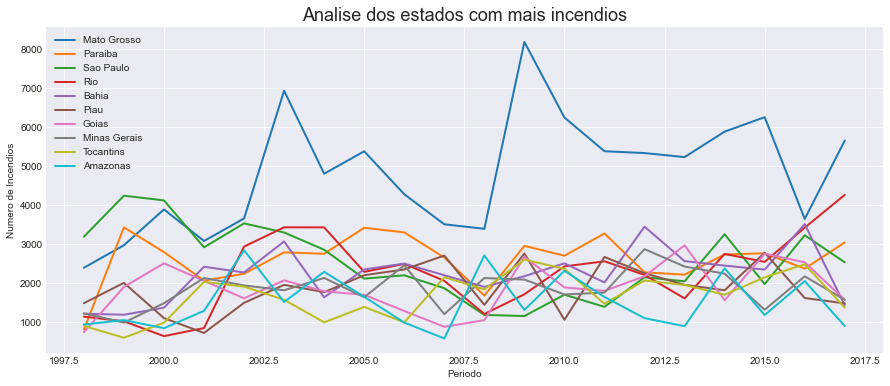

In [85]:
plt.figure(figsize= (15, 6))
plt.title('Analise dos estados com mais incendios', fontsize= 18)
for coluna in lista_ranking_incendios:
    
    #___ filtrar os estados
    filtro = base_dados.loc[base_dados['state'] == coluna]
    #___ agrupar os valores para sumarizar
    analise_estado = filtro.groupby(by= ['year']).sum().reset_index()
    #___ plot
    
    sns.lineplot(data= analise_estado, x='year', y='number', linewidth= 2)

plt.xlabel('Periodo')
plt.ylabel('Numero de Incendios')
plt.legend(lista_ranking_incendios);
    

In [86]:
# Plot Geográfico

# Gerando os estados
estados = analise_tres.sort_values('state')['state'].values

# Gerando os valores
valores = analise_tres.sort_values('state')['number'].values

# Latitudes
lat = [ -8.77, -9.71, 1.41, -3.07,-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28, -22.84, -11.22, 1.89, -27.33, -23.55, -10.90, -10.25 ]

# Longitudes
log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados
dicionario = {
    'Estados' : estados,
    'Latitude' : lat,
    'Longitude' : log,
    'Incêndios' : valores
}
# Lendo o dicionario
analise_geografica = pd.DataFrame ( dicionario )

analise_geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [90]:
import plotly.express as px

px.density_mapbox(
    analise_geografica,
    lat= 'Latitude',
    lon= 'Longitude',
    z= 'Incêndios',
    radius= 30,
    center= dict(lat= -12.700, lon= -46.5555),
    zoom= 3,
    mapbox_style= 'stamen-terrain'
)